# Biological Oceanography (BO)

<img src="Prochlorococcus_marinus.jpeg"/>


This tutorial is part of our Biological Oceanography day. It demonstrates how to do basic analysis and visualization of gridded biological data. We will use A,B,and C data which can be downloaded using CMAP API, a giant data database for Earth system observations and modeling. To download the data using API, please register at CMAP and generate your API key.

### Estimated tutorial time: 1.5 hours

## Tutorial goals

- Python Skills
    - Work with dataframes
    - Make different statistical plots
    - Data co-location
- BO knowledge
    - Learn about global ocean photosynthesis and primary productivity signatures from satellite observations 
    - Understand the vertical distributions of chlorophyll, nutrients, and light availability in the ocean
    - Explore biodiversity and how populations change in different regions of the ocean
    
## Reading 

Brierley, A. S. (2017). Plankton. Current Biology, 27(11), R478-R483. https://www.sciencedirect.com/science/article/pii/S0960982217302154

Armbrust, E. V., & Palumbi, S. R. (2015). Uncovering hidden worlds of ocean biodiversity. Science, 348(6237), 865-867. https://doi.org/10.1126/science.aaa7378

Bristow, L. A., Mohr, W., Ahmerkamp, S., & Kuypers, M. M. (2017). Nutrients that limit growth in the ocean. Current Biology, 27(11), R474-R478. https://www.sciencedirect.com/science/article/pii/S0960982217303287

Tang, W., Llort, J., Weis, J., Perron, M. M., Basart, S., Li, Z., ... & Cassar, N. (2021). Widespread phytoplankton blooms triggered by 2019–2020 Australian wildfires. Nature, 597(7876), 370-375. https://www.nature.com/articles/s41586-021-03805-8

Sala, E., Mayorga, J., Bradley, D. et al. Protecting the global ocean for biodiversity, food and climate. Nature 592, 397–402 (2021). https://doi.org/10.1038/s41586-021-03371-z

# Let's start!

In [3]:
import pandas as pd
import numpy as np
import pycmap
import plotly.express as px

import matplotlib.pyplot as plt

import cartopy.crs as ccrs         # to plot maps with different projections
import cartopy.feature as cfeature # to plot coastlines, land, borders, etc.

#!pip install joypy
from joypy import joyplot          # to make nice-looking ridge plots 


from matplotlib.colors import LogNorm
import xarray as xr



In [60]:
api = pycmap.API(token='1z985f12-x4d8-1r5d-d1g9-0j90f2c5duk2')
modis=api.query(
         '''
         SELECT [time], lat, lon, chl FROM tblCHL_REP 
         WHERE 
         [time] BETWEEN '2016-01-01' AND '2016-01-07' AND 
         lat BETWEEN -90 AND 90 AND 
         lon BETWEEN 0 AND 360
         '''
         ) 
df_rows = pd.DataFrame(modis).set_index(["time", "lon", "lat"])
ds = xr.Dataset.from_dataframe(df_rows)

## Chlorophyll A estimates from satellite observations of ocean color

In [75]:
#we can download the chlorophyll dataset from NASA's servers using URL
fn = 'https://oceandata.sci.gsfc.nasa.gov/opendap/MODISA/L3SMI/2010/001/A20100012010365.L3m_YR_CHL_chl_ocx_9km.nc'
modis=xr.open_dataset(fn)

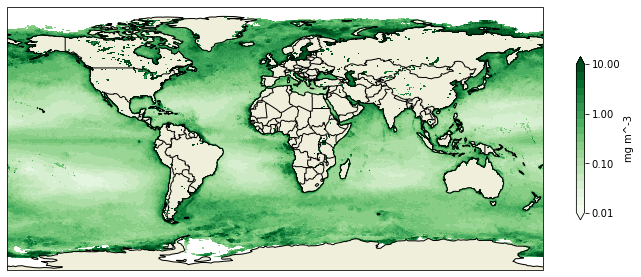

In [79]:
plt.figure(figsize=(12,6)); # this creates a figure of size (12,6) inches.
ax = plt.axes(projection=ccrs.PlateCarree()) #this specifies which projection to use
im=plt.contourf(modis.lon,modis.lat,modis['chl_ocx'], 
                norm=LogNorm(),
                levels=np.logspace(-2,1,20),extend='both', 
                vmin=1e-2, vmax=10,
                cmap=plt.get_cmap('Greens'), 
                transform=ccrs.PlateCarree())
cbar=plt.colorbar(im,shrink=0.5, ticks=(0.01,0.1,1,10), label=modis['chl_ocx'].units);

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.BORDERS);

### Call API

#### Get the API key by registering at simonscmap.com and then going to https://simonscmap.com/apikeymanagement

In [75]:
key = '1z985f12-x4d8-1r5d-d1g9-0j90f2c5duk2'                    # enter you API key here
api = pycmap.API(token=key) # call api using your unique api key

In [70]:
# get catalog of all datasets- very long
api.get_catalog()
# search for a dataset with a specific keyword
api.search_catalog('Dissolved iron')

,Variable,Table_Name,Long_Name,Unit,Make,Sensor,Process_Level,Study_Domain,Temporal_Resolution,Spatial_Resolution,...,Dataset_Name,Dataset_Short_Name,Data_Source,Distributor,Dataset_Description,Acknowledgement,Dataset_ID,ID,Visualize,Keywords
0,Fe,tblPisces_NRT,Mole concentration of dissolved iron in sea water,mmol/m^3,Model,Blend,Near-Real-Time,Biogeochemistry,Weekly,1/2Â° X 1/2Â°,...,Mercator-Pisces Biogeochemistry and Weekly For...,Mercator_Pisces_Biogeochem_Climatology,MERCATOR BIOMER4V1R2,http://marine.copernicus.eu,"""Produced by Mercator Ocean in Toulouse, Franc...",Data provided by: E.U. Copernicus Marine Servi...,17,39,1,"bio, biogeochem, biogeochemistry, biogo, blend..."
1,fe,tblPisces_Forecast,Mole Concentration of Dissolved Iron in Sea Water,mmol/m^3,Model,Blend,Near-Real-Time,Biogeochemistry,Daily,1/4Â° X 1/4Â°,...,Mercator-Pisces Biogeochemistry Daily Forecast,Mercator_Pisces_Biogeochemistry_Daily_Forecast,GLOBAL_ANALYSIS_FORECAST_BIO_001_014_TDS,http://marine.copernicus.eu,The Mercator-Pisces Biogeochemistry Daily Fore...,Data provided by: E.U. Copernicus Marine Servi...,448,7637,1,"0.25, 1/4 degree, 3D, biogeochemistry, blend, ..."
2,Fe,tblMGL1704_Gradients2_Trace_Metals,Dissolved iron concentrations,nM,Observation,Towfish,Reprocessed,Chemistry+Biogeochemistry,Irregular,Irregular,...,MGL 1704 Gradients 2 Towfish Trace Elements,Gradients 2 towfish trace metals,John Lab USC,John Lab - USC,Samples were collected in the North Pacific on...,NaN,176,2781,1,"biogeochemistry, chemistry, cruise, dissolved ..."


### Seaflow dataset

In [5]:
# read in seaflow dataset (surface level- 5m- continuous samples across 50 cruises)
seaflow = api.get_dataset('tblSeaFlow')
print(f'seaflow columns only: {seaflow.columns.values.tolist()}\n')
# can also get with ancilliary data
#seaflow_all = api.get_dataset_with_ancillary("tblSeaFlow")
#print(f'seaflow with ancilliary: {seaflow_all.columns.values.tolist()}')

seaflow columns only: ['time', 'lat', 'lon', 'depth', 'cruise', 'abundance_prochloro', 'abundance_synecho', 'abundance_picoeuk', 'abundance_croco', 'diam_prochloro', 'diam_synecho', 'diam_picoeuk', 'diam_croco', 'Qc_prochloro', 'Qc_synecho', 'Qc_picoeuk', 'Qc_croco', 'biomass_prochloro', 'biomass_synecho', 'biomass_picoeuk', 'biomass_croco']



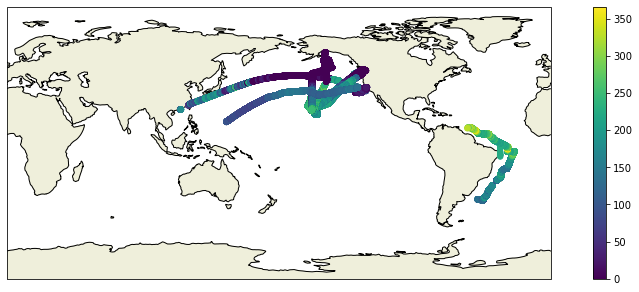

In [13]:
## example plot of prochlorococcus biomass distribution for seaflow
#fig = px.scatter_geo(seaflow, lat='lat',lon='lon',color='abundance_prochloro')
#fig.show()

plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180)); #this specifies which projection to use
ax.set_global();
ax.add_feature(cfeature.COASTLINE);
ax.add_feature(cfeature.LAND);
#ax.add_feature(cfeature.BORDERS);
im=ax.scatter(seaflow['lon'],seaflow['lat'],30,c=seaflow['abundance_prochloro'],transform=ccrs.PlateCarree());
plt.colorbar(im);



### HOT dataset

In [14]:
# read in hawaii ocean time series (HOT) data (1998-2019)
## https://simonscmap.com/catalog/datasets/HOT_PP
HOT = api.get_dataset('tblHOT_PP')
print(f'HOT columns only: {HOT.columns.values.tolist()}\n')
# this dataset also has pre-colcalized ancilliary data
HOT_all = api.get_dataset_with_ancillary("tblHOT_PP")

HOT columns only: ['time', 'lat', 'lon', 'depth', 'cruise_name', 'chl_hot', 'phaeopigments_hot', 'itype', 'light_12_hot', 'dark_12_hot', 'salinity_hot', 'prochlorococcus_hot', 'heterotrophic_bacteria_hot', 'synechococcus_hot', 'eukaryotes_hot']



In [157]:
HOT

,time,lat,lon,depth,cruise_name,chl_hot,phaeopigments_hot,itype,light_12_hot,dark_12_hot,salinity_hot,prochlorococcus_hot,heterotrophic_bacteria_hot,synechococcus_hot,eukaryotes_hot,depth_cat
0,1988-11-02T00:00:00,22.75,-158,24,HOT001,0.129,0.077,0,12.210,NaN,NaN,NaN,NaN,NaN,NaN,25
1,1988-11-02T00:00:00,22.75,-158,42,HOT001,0.192,0.051,0,2.470,0.07,NaN,NaN,NaN,NaN,NaN,40
2,1988-11-02T00:00:00,22.75,-158,68,HOT001,0.285,0.303,0,2.580,0.06,NaN,NaN,NaN,NaN,NaN,75
3,1988-11-02T00:00:00,22.75,-158,114,HOT001,0.326,0.044,0,0.720,0.16,NaN,NaN,NaN,NaN,NaN,125
4,1988-12-04T00:00:00,22.75,-158,0,HOT002,0.202,0.000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2424,2019-12-19T00:00:00,22.75,-158,75,HOT317,0.111,0.188,2,3.020,NaN,34.7300,191803.0,392462.0,1612.0,1295.0,75
2425,2019-12-19T00:00:00,22.75,-158,100,HOT317,0.282,0.489,2,3.037,NaN,34.7891,102670.0,362702.0,254.0,3668.0,100
2426,2019-12-19T00:00:00,22.75,-158,125,HOT317,0.169,0.374,2,0.560,NaN,34.8342,55397.0,273620.0,0.0,1722.0,125
2427,2019-12-19T00:00:00,22.75,-158,150,HOT317,0.035,0.097,2,NaN,NaN,34.9565,5613.0,235178.0,0.0,260.0,150


### Light attenuation vs lack of nutrients

<img src="Attenuation-of-light-underwater.png" width=400/>


In [17]:
HOT['depth_cat']=np.nan;
HOT.loc[HOT['depth'] < 10, 'depth_cat'] = 5
HOT.loc[(HOT['depth'] > 20) & (HOT['depth'] < 30), 'depth_cat'] = 25
HOT.loc[(HOT['depth'] > 30) & (HOT['depth'] < 50), 'depth_cat'] = 40
HOT.loc[(HOT['depth'] > 50) & (HOT['depth'] < 80), 'depth_cat'] = 75
HOT.loc[(HOT['depth'] > 80) & (HOT['depth'] < 110), 'depth_cat'] = 100
HOT.loc[(HOT['depth'] > 110) & (HOT['depth'] < 130), 'depth_cat'] = 125
HOT.loc[(HOT['depth'] > 130) & (HOT['depth'] < 160), 'depth_cat'] = 150
HOT.loc[(HOT['depth'] > 160) & (HOT['depth'] < 180), 'depth_cat'] = 175

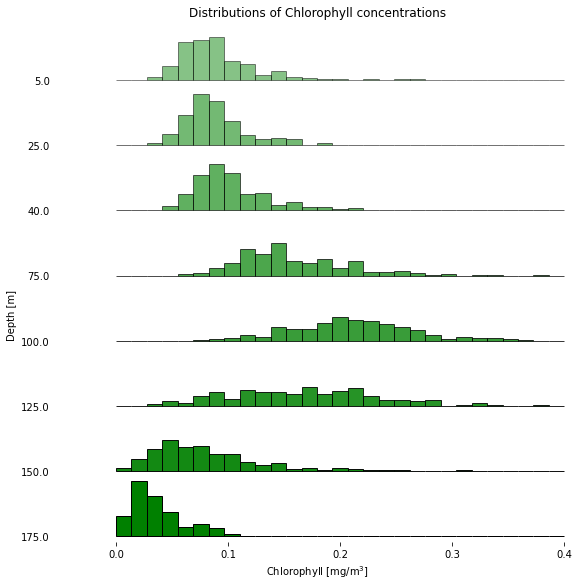

In [61]:
fig, axes = joyplot(HOT, by = 'depth_cat', column = 'chl_hot', 
                    color='Green', fade = True, 
                    title='Distributions of Chlorophyll concentrations',
                    x_range=[-0.05,0.41],
                    hist=True, bins=np.linspace(0, 0.4,30), overlap=0,
                    figsize=(8,8))
axes[-1].set_xlabel('Chlorophyll [mg/m$^3$]') 
axes[4].set_ylabel('Depth [m]') 
plt.savefig('chl_depth.pdf')
plt.show()

## Organisms 

<img src="organisms.png"/>

Armbrust, E. V., & Palumbi, S. R. (2015). Uncovering hidden worlds of ocean biodiversity. Science, 348(6237), 865-867. https://doi.org/10.1126/science.aaa7378

### Data from Flombaum et al 2013

In [20]:
# flowcytometry data that went into Flombaum et al
fl_2013 = api.get_dataset('tblFlombaum')

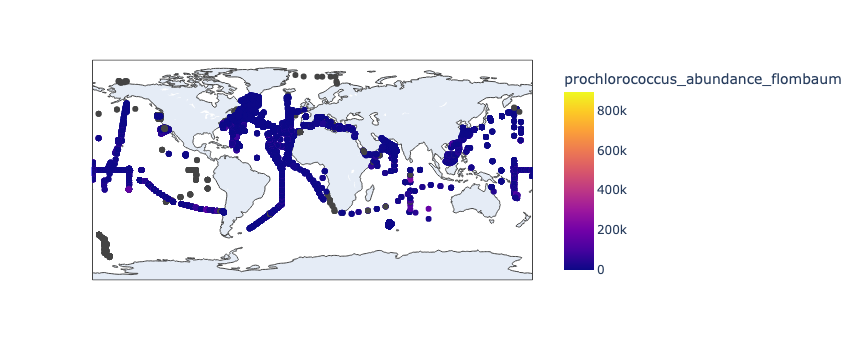

In [ ]:
# lets look at prochlorococcus abundance above 50 m
fl_surface = fl_2013[fl_2013['depth']>= 50]
pro_min, pro_max = np.min(fl_surface['prochlorococcus_abundance_flombaum']), np.max(fl_surface['prochlorococcus_abundance_flombaum'])
px.scatter_geo(fl_surface, lat='lat',lon='lon',color='prochlorococcus_abundance_flombaum', 
               animation_frame='year', range_color=[pro_min, pro_max])

In [76]:
modis = api.get_dataset('tblModis_CHL')


The requested dataset has 8416742400 records.
It is not recommended to retrieve datasets with more than 2000000 rows using this method.
For large datasets, please use the 'space_time' method and retrieve the data in smaller chunks.


SystemExit: 1

In [91]:
modis=api.query(
         '''
         SELECT [time], AVG(lat) AS lat, AVG(lon) AS lon, AVG(chlor_a) AS chlor_a FROM tblModis_CHL  
         WHERE 
         [time] BETWEEN '2016-06-01' AND '2016-10-01' AND 
         lat BETWEEN 23 AND 50 AND 
         lon BETWEEN -160 AND -158  
         GROUP BY [time] 
         ORDER BY [time] 
         '''
         ) 